# Pandas
## TOC:
- [Build DataFrame from CSV file](#Build-DataFrame-from-CSV-file)
- [Create DataFrame from dictionary](#Create-DataFrame-from-dictionary)
- [Create DataFrame from list](#Create-DataFrame-from-list)
- [Writing DataFrame to file](#Writing-DataFrame-to-file)
- [DataFrame Index and Columns](#DataFrame-Index-and-Columns)
- [DataFrame Series](#DataFrame-Series)
- [Broadcasting](#Broadcasting)
- [Slicing DataFrame](#Slicing-DataFrame)
- [Sub-DataFrame](#Sub-DataFrame)
- [Element access](#Element-access)
- [DataFrame 'n' NumPy](#DataFrame-'n'-NumPy)
- [Plotting NumPy Array, Pandas Series and DataFrame](#Plotting-NumPy-Array,-Pandas-Series-and-DataFrame)
- [Saving Plots](#Saving-Plots)

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Build DataFrame from CSV file

In [88]:
cars = pd.read_csv("datasets/cars.csv")
cars

,country_id,cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [89]:
brics = pd.read_csv("datasets/brics.csv", index_col=0)
brics

,country,population,area,capital
BR,Brazil,200,8515767,Brasilia
RU,Russia,144,17098242,Moscow
IN,India,1252,3287590,New Delhi
CH,China,1357,9596961,Beijing
SA,South Africa,55,1221037,Pretoria


In [90]:
aapl = pd.read_csv("datasets/aapl.csv", index_col='Date', parse_dates=True)
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [91]:
column_names = ['year', 'month', 'day', 'dec_date', 'sunspots', 'definite']
silso = pd.read_csv('datasets/silso.csv', header=None, names=column_names, na_values={'sunspots': [' -1']}, 
                    parse_dates=[[0, 1, 2]])
silso

,year_month_day,dec_date,sunspots,definite
0,1818-01-01,1818.004,NaN,1
1,1818-01-02,1818.007,NaN,1
2,1818-01-03,1818.010,NaN,1
3,1818-01-04,1818.012,22.0,1
4,1818-01-05,1818.015,NaN,1
5,1818-01-06,1818.018,NaN,1
6,1818-01-07,1818.020,NaN,1
7,1818-01-08,1818.023,46.0,1
8,1818-01-09,1818.026,59.0,1
9,1818-01-10,1818.029,63.0,1


In [92]:
stock_data = pd.read_csv('datasets/stock_data_messy.tsv', delimiter=' ', header=3, comment='#')
stock_data

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


### Create DataFrame from dictionary

In [93]:
users_dict = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
              'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
              'visitors': [139, 237, 326, 456],
              'signups': [7, 12, 3, 5]}
users_df = pd.DataFrame(users_dict)
users_df

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


In [94]:
heights = [59.1, 61.3, 64.7, 60.5, 64.4, 65.2, 61.8]
heights_sex_dict = {'height': heights, 'sex': 'M'}
heights_sex_df = pd.DataFrame(heights_sex_dict)
heights_sex_df

,height,sex
0,59.1,M
1,61.3,M
2,64.7,M
3,60.5,M
4,64.4,M
5,65.2,M
6,61.8,M


### Create DataFrame from list

In [95]:
array_df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['X', 'Y', 'Z'], index=['x', 'y', 'z'])
array_df

,X,Y,Z
x,1,2,3
y,4,5,6
z,7,8,9


### Writing DataFrame to file

In [96]:
stock_data.to_csv('datasets/stock_data_clean.csv', index=False)

In [97]:
silso.to_excel('datasets/silso.xlsx')

In [98]:
brics.head()

,country,population,area,capital
BR,Brazil,200,8515767,Brasilia
RU,Russia,144,17098242,Moscow
IN,India,1252,3287590,New Delhi
CH,China,1357,9596961,Beijing
SA,South Africa,55,1221037,Pretoria


In [99]:
brics.head(2)

,country,population,area,capital
BR,Brazil,200,8515767,Brasilia
RU,Russia,144,17098242,Moscow


In [100]:
brics.tail()

,country,population,area,capital
BR,Brazil,200,8515767,Brasilia
RU,Russia,144,17098242,Moscow
IN,India,1252,3287590,New Delhi
CH,China,1357,9596961,Beijing
SA,South Africa,55,1221037,Pretoria


In [101]:
brics.tail(2)

,country,population,area,capital
CH,China,1357,9596961,Beijing
SA,South Africa,55,1221037,Pretoria


### DataFrame Index and Columns

In [102]:
type(brics)

pandas.core.frame.DataFrame

In [103]:
brics.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [104]:
type(brics.columns)

pandas.indexes.base.Index

In [105]:
brics.index

Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object')

In [106]:
type(brics.index)

pandas.indexes.base.Index

In [107]:
array_df.columns = ['A', 'B', 'C']
array_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
A    3 non-null int64
B    3 non-null int64
C    3 non-null int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [108]:
array_df.index = ['a', 'b', 'c']
array_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 3 columns):
A    3 non-null int64
B    3 non-null int64
C    3 non-null int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [109]:
array_df

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9


In [110]:
silso.index = silso['year_month_day']
silso.index.name = 'date'
silso

,year_month_day,dec_date,sunspots,definite
date,,,,
1818-01-01,1818-01-01,1818.004,NaN,1
1818-01-02,1818-01-02,1818.007,NaN,1
1818-01-03,1818-01-03,1818.010,NaN,1
1818-01-04,1818-01-04,1818.012,22.0,1
1818-01-05,1818-01-05,1818.015,NaN,1
1818-01-06,1818-01-06,1818.018,NaN,1
1818-01-07,1818-01-07,1818.020,NaN,1
1818-01-08,1818-01-08,1818.023,46.0,1
1818-01-09,1818-01-09,1818.026,59.0,1


In [111]:
brics.shape

(5, 4)

In [112]:
brics.size

20

In [113]:
brics.count()

country       5
population    5
area          5
capital       5
dtype: int64

In [114]:
brics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, BR to SA
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null int64
area          5 non-null int64
capital       5 non-null object
dtypes: int64(2), object(2)
memory usage: 200.0+ bytes


In [115]:
silso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 1818-01-01 to 1818-01-10
Data columns (total 4 columns):
year_month_day    10 non-null datetime64[ns]
dec_date          10 non-null float64
sunspots          4 non-null float64
definite          10 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 400.0 bytes


### DataFrame Series

In [116]:
brics['country']

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

In [117]:
type(brics['country'])

pandas.core.series.Series

In [118]:
brics.country

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

In [119]:
brics.get('country')

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

In [120]:
brics.loc['BR']

country         Brazil
population         200
area           8515767
capital       Brasilia
Name: BR, dtype: object

In [121]:
type(brics.loc['BR'])

pandas.core.series.Series

In [122]:
brics.loc['BR', ['country', 'capital']]

country      Brazil
capital    Brasilia
Name: BR, dtype: object

In [123]:
type(brics.loc['BR', ['country', 'capital']])

pandas.core.series.Series

In [124]:
brics['country'].head(2)

BR    Brazil
RU    Russia
Name: country, dtype: object

In [125]:
brics['country'].tail(2)

CH           China
SA    South Africa
Name: country, dtype: object

In [126]:
list_series = pd.Series([1, 2, 3, 4])
list_series

0    1
1    2
2    3
3    4
dtype: int64

### Broadcasting

In [127]:
users_df['fees'] = 0
users_df

,city,signups,visitors,weekday,fees
0,Austin,7,139,Sun,0
1,Dallas,12,237,Sun,0
2,Austin,3,326,Mon,0
3,Dallas,5,456,Mon,0


In [128]:
brics['on_earth'] = [True, True, True, True, True]
brics

,country,population,area,capital,on_earth
BR,Brazil,200,8515767,Brasilia,True
RU,Russia,144,17098242,Moscow,True
IN,India,1252,3287590,New Delhi,True
CH,China,1357,9596961,Beijing,True
SA,South Africa,55,1221037,Pretoria,True


In [129]:
brics['density'] = brics['population'] / brics['area'] * 1000000
brics

,country,population,area,capital,on_earth,density
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680


### Slicing DataFrame

In [130]:
brics.iloc[:2,:]

,country,population,area,capital,on_earth,density
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918


In [131]:
brics.iloc[-2:,:]

,country,population,area,capital,on_earth,density
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680


In [132]:
brics.iloc[1:3,:]

,country,population,area,capital,on_earth,density
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076


In [133]:
brics.iloc[:,1:-1]

,population,area,capital,on_earth
BR,200,8515767,Brasilia,True
RU,144,17098242,Moscow,True
IN,1252,3287590,New Delhi,True
CH,1357,9596961,Beijing,True
SA,55,1221037,Pretoria,True


### Sub-DataFrame

In [134]:
brics.loc[['BR']]

,country,population,area,capital,on_earth,density
BR,Brazil,200,8515767,Brasilia,True,23.485847


In [135]:
brics.loc[['BR', 'CH']]

,country,population,area,capital,on_earth,density
BR,Brazil,200,8515767,Brasilia,True,23.485847
CH,China,1357,9596961,Beijing,True,141.398928


In [136]:
brics.loc['BR': 'IN']

,country,population,area,capital,on_earth,density
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076


In [137]:
brics[['country']]

,country
BR,Brazil
RU,Russia
IN,India
CH,China
SA,South Africa


In [138]:
silso = silso[['sunspots', 'definite']]
silso

,sunspots,definite
date,,
1818-01-01,NaN,1
1818-01-02,NaN,1
1818-01-03,NaN,1
1818-01-04,22.0,1
1818-01-05,NaN,1
1818-01-06,NaN,1
1818-01-07,NaN,1
1818-01-08,46.0,1
1818-01-09,59.0,1


In [139]:
brics.loc[['BR', 'CH'], ['population', 'area']]

,population,area
BR,200,8515767
CH,1357,9596961


### Element access

In [140]:
brics['capital'].loc['CH']

'Beijing'

In [141]:
type(brics['capital'].loc['CH'])

str

In [142]:
brics.loc['CH']['capital']

'Beijing'

In [143]:
brics.loc['CH', 'capital']

'Beijing'

### DataFrame 'n' NumPy

In [144]:
brics_area_log10 = np.log10(brics[['area']])
brics_area_log10

,area
BR,6.930224
RU,7.232951
IN,6.516878
CH,6.982134
SA,6.086729


In [145]:
type(brics_area_log10)

pandas.core.frame.DataFrame

In [146]:
brics.index.values

array(['BR', 'RU', 'IN', 'CH', 'SA'], dtype=object)

In [147]:
type(brics.index.values)

numpy.ndarray

In [148]:
brics.columns.values

array(['country', 'population', 'area', 'capital', 'on_earth', 'density'], dtype=object)

In [149]:
type(brics.columns.values)

numpy.ndarray

In [150]:
brics.values

array([['Brazil', 200, 8515767, 'Brasilia', True, 23.48584690022637],
       ['Russia', 144, 17098242, 'Moscow', True, 8.421918463898217],
       ['India', 1252, 3287590, 'New Delhi', True, 380.82607624430057],
       ['China', 1357, 9596961, 'Beijing', True, 141.39892826489552],
       ['South Africa', 55, 1221037, 'Pretoria', True, 45.04368008504247]], dtype=object)

In [151]:
type(brics.values)

numpy.ndarray

In [152]:
brics['country'].values

array(['Brazil', 'Russia', 'India', 'China', 'South Africa'], dtype=object)

In [153]:
type(brics['country'].values)

numpy.ndarray

In [154]:
brics.loc['BR'].values

array(['Brazil', 200, 8515767, 'Brasilia', True, 23.48584690022637], dtype=object)

In [155]:
type(brics.loc['BR'].values)

numpy.ndarray

### Plotting NumPy Array, Pandas Series and DataFrame

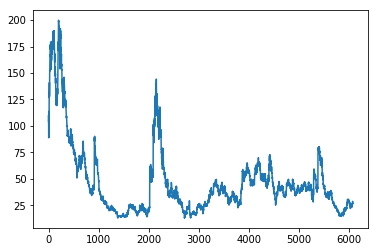

In [156]:
close_array = aapl['Close'].values
plt.plot(close_array)
plt.show()

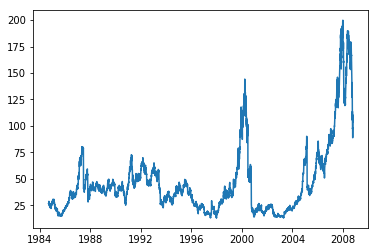

In [157]:
close_series = aapl['Close']
plt.plot(close_series)
plt.show()

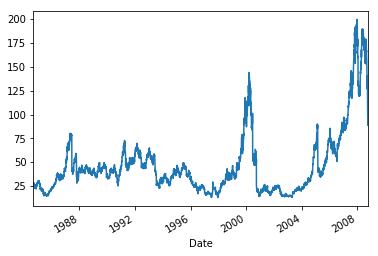

In [158]:
close_series = aapl['Close']
close_series.plot()
plt.show()

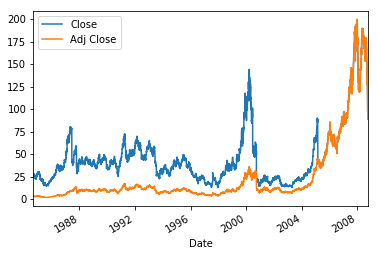

In [159]:
aapl[['Close', 'Adj Close']].plot()
plt.show()

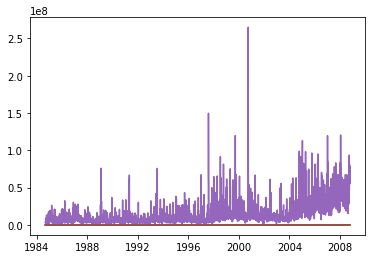

In [160]:
plt.plot(aapl)
plt.show()

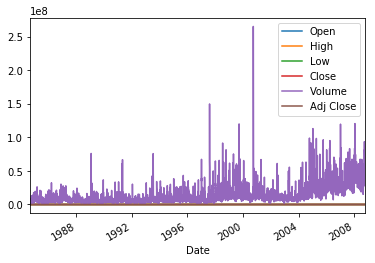

In [161]:
aapl.plot()
plt.show()

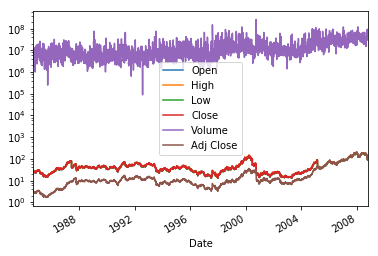

In [162]:
aapl.plot()
plt.yscale('log')
plt.show()

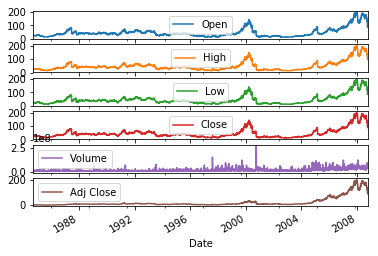

In [163]:
aapl.plot(subplots=True)
plt.show()

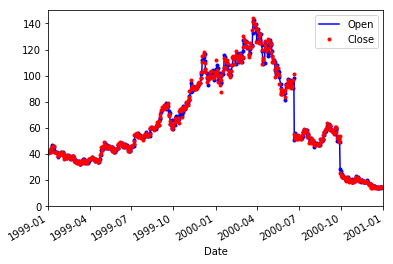

In [164]:
aapl['Open'].plot(color='b', style='.-', legend=True)
aapl['Close'].plot(color='r', style='.', legend=True)
plt.axis(('1999', '2001', 0, 150))
plt.show()

### Saving Plots

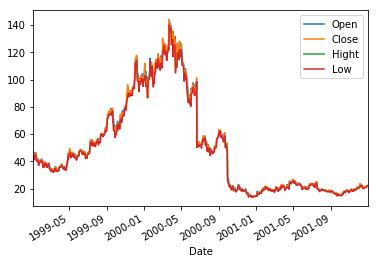

In [165]:
aapl.loc['2001':'1999', ['Open', 'Close', 'Hight', 'Low']].plot()
plt.savefig('plots/aapl.png')
plt.savefig('plots/aapl.pdf')
plt.show()